# 住宅情報の分析

アイオワ州エイムズ市の住宅価格データセットを使い、基本的なデータの扱い方を学んでいきます。


住宅に関する79種類もの説明変数が用意されているため、それらと価格との関係を探索していきましょう。


エイムズがどのような街なのかもWikipediaなどで確認しておくと良いでしょう。

### Kaggleの EDA参考Notebooks

https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python

https://www.kaggle.com/dejavu23/house-prices-eda-to-ml-beginner

https://www.kaggle.com/timolee/a-home-for-pandas-and-sklearn-beginner-how-tos

### データセットの準備

https://www.kaggle.com/c/house-prices-advanced-regression-techniques

この中のtrain.csvを使用します。これをダウンロードし、Jupyter Notebookで使っているディレクトリに置いてください。

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns

### 【問題1】データセットの取得

`pd.read_csv()`を使用して、変数に格納してください。

In [2]:
train = pd.read_csv("train.csv")

### 【問題2】データセット自体の調査

KaggleのOverviewページや、Dataページの「Data fields」などを読みながら、どのようなデータセットかを説明してください。

In [3]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


アイオワ州エイムズの住宅について8０の特徴量で構成されたデータセットである。
その家自身の種類から（MSSubClassなど）、周辺の環境（StreetやNeighborhoodなど）、その住宅の価格（SalePrice）を決めるのに必要な情報が入っている。

### 【問題3】データの確認

データを確認していきます。コードとマークダウンを組み合わせてレポートしてください。

-  **各特徴量がどういったものかを見る。（数値データか文字データなど）**

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

データ型はfloat, int, objectの3種類で一部欠損値がある物も含まれている。

- **今回の目的変数はどの列か確認する。**

今回の目的変数は列番号80の**SalePrice**である。

概要にその旨が記載されていた。

- **特徴量の平均値と標準偏差、四分位数を一度に表示させる。**

In [5]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### 【問題4】欠損値への対応

参考URL：

https://note.nkmk.me/python-pandas-nan-dropna-fillna/

#### 1. 各特徴量の欠損値の有無を確認する。
#### 2. 欠損値が何パーセント含まれるかを確認する。

- 欠損値の有無だけを単純に出したい場合

In [6]:
train.isnull().any(axis=0)

Id               False
MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 81, dtype: bool

-  欠損値が0個以外の場合（欠損値がある場合）のみ、その個数を表示したい場合

In [7]:
import missingno as msno

In [8]:
train_value = train.isnull().sum()
train_value[train_value>0].sort_values(ascending=False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

- 欠損値が0個以外の場合（欠損値がある場合）のみ、その比率を表示したい場合

In [9]:
rate0 = 0
samples = len(train)
missing_rate = train.isnull().sum()/samples * 100
print(type(missing_rate))
missing_rate[missing_rate > rate0].sort_values(ascending=False)

<class 'pandas.core.series.Series'>


PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

-  欠損値が0個以外の場合（欠損値がある場合）のみ、その個数をと比率の両方を表示したい場合

In [10]:
mis_val = pd.concat([(train.isnull().sum()), (100 * train.isnull().sum() / len(train))], axis=1)
mis_val_table = mis_val.rename(columns = {0 : '欠損数', 1 : '欠損率'}).sort_values("欠損率", ascending=False)
mis_val_table

,欠損数,欠損率
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
...,...,...
ExterQual,0,0.000000
Exterior2nd,0,0.000000
Exterior1st,0,0.000000
RoofMatl,0,0.000000


#### 3. 5つ以上欠損値がある特徴量（列）は削除する。

In [11]:
thresh_n = samples - 5
train_col = train.dropna(thresh=thresh_n, axis=1)
print(type(train_col))
train_col

<class 'pandas.core.frame.DataFrame'>


,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


#### 確認

In [12]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [13]:
train_col

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [14]:
#5個以上の欠損値を物特徴量の数
train_value = train.isnull().sum()
len(train_value[train_value>=5].sort_values(ascending=False))

18

**削除前の特徴量の数が81個、削除後の特徴量の数が63個。**

**5個以上の欠損値を物特徴量の数が18個の為、81-63=18で検算もOK。**

#### 4. 欠損値があるサンプル（行）は削除する。

In [15]:
train_non_m = train.dropna(how="any",axis=1)
train_non_m

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


#### 確認

In [16]:
train_non_m.isnull().sum()# 欠損値の総数が0であれば、欠損値は無い

Id               0
MSSubClass       0
MSZoning         0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 62, dtype: int64

### 【問題5】用語の調査

以下の２つの単語を知る必要があります。これらを調査してまとめてください。

- 尖度（kurtosis）

分布が正規分布からどれだけ尖っているかを表す統計量で、山の尖り度と裾の広がり度を示す。正規分布より尖った分布（データが平均付近に集中し、分布の裾が重い）のときには正の値を、正規分布より扁平な分布（データが平均付近から散らばり、分布の裾が軽い）のときには負の値をとる。正規分布の場合には0になる。pandasの.kurt()メソッドで計算できる。


- 歪度（skewness）

分布が正規分布からどれだけ歪んでいるかを表す統計量で、左右対称性を示す指標のこと。「右裾が長い」もしくは「右に歪んだ」もしくは「左に偏った」分布のときには正の値を、「左裾が長い」もしくは「左に歪んだ」もしくは「右に偏った」分布のときには負の値をとる。左右対称の分布（例えば正規分布）の場合には0になる。pandasの.skew()で計算できる。

### 【問題6】分布の確認

1. seabornの`sns.distplot()`を使い目的変数の分布を表示し、「尖度」と「歪度」も算出する。
2. 目的変数に対して対数変換を行う。
3. 対数変換したものに対して分布を表示し、「尖度」と「歪度」も算出する。
4. 対数変換の前後での変化を「正規分布」という言葉を含めて説明してください。このように加工することで予測時の精度を上げることができます。

/Users/SHOTA/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice'>

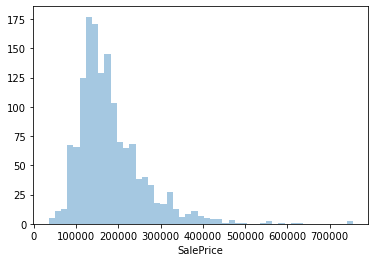

In [17]:
# 散布図で分布を確認
sns.distplot(train['SalePrice'], kde=False) 

#### 1. seabornの`sns.distplot()`を使い目的変数の分布を表示し、「尖度」と「歪度」も算出する。

In [18]:
#尖度
kurtosis = train['SalePrice'].kurt()

#歪度
skewness = train['SalePrice'].skew()

print("尖度", kurtosis)
print("歪度", skewness)

尖度 6.536281860064529
歪度 1.8828757597682129


#### 2. 目的変数に対して対数変換を行う。

In [19]:
SalePrice_log = train['SalePrice'].apply(np.log)

#### 3. 対数変換したものに対して分布を表示し、「尖度」と「歪度」も算出する。

<AxesSubplot:xlabel='SalePrice'>

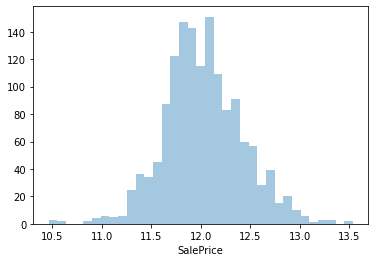

In [20]:
# 散布図で確認
sns.distplot(SalePrice_log, kde=False) 

In [21]:
#尖度
kurtosis_log = SalePrice_log.kurt()

#歪度
skewness_log = SalePrice_log.skew()

print("尖度", kurtosis_log)
print("歪度", skewness_log)

尖度 0.8095319958036296
歪度 0.12133506220520406


#### 4. 対数変換の前後での変化を「正規分布」という言葉を含めて説明してください。このように加工することで予測時の精度を上げることができます。

対数変換を行うことで歪度が減り、データが正規分布に近づいたので扱いやすくなった。

### 【問題7】相関係数の確認

特徴量の確認をしていきます。それぞれに対してマークダウンで説明や考察を書いてください。


1. 相関係数行列のヒートマップを作り、相関係数の高い関係を見つける。
2. 目的変数との相関の高い特徴量10個を選び、これらだけの相関係数行列ヒートマップを作る。
3. 選んだ10個の特徴量が何か表しているかをKaggleのDataDescriptionの記述を参考に日本語でまとめる。
4. 選んだ10個の特徴量の中でお互いの相関係数が高い組み合わせを3つ探し出す。


#### 1. 相関係数行列のヒートマップを作り、相関係数の高い関係を見つける。

<AxesSubplot:>

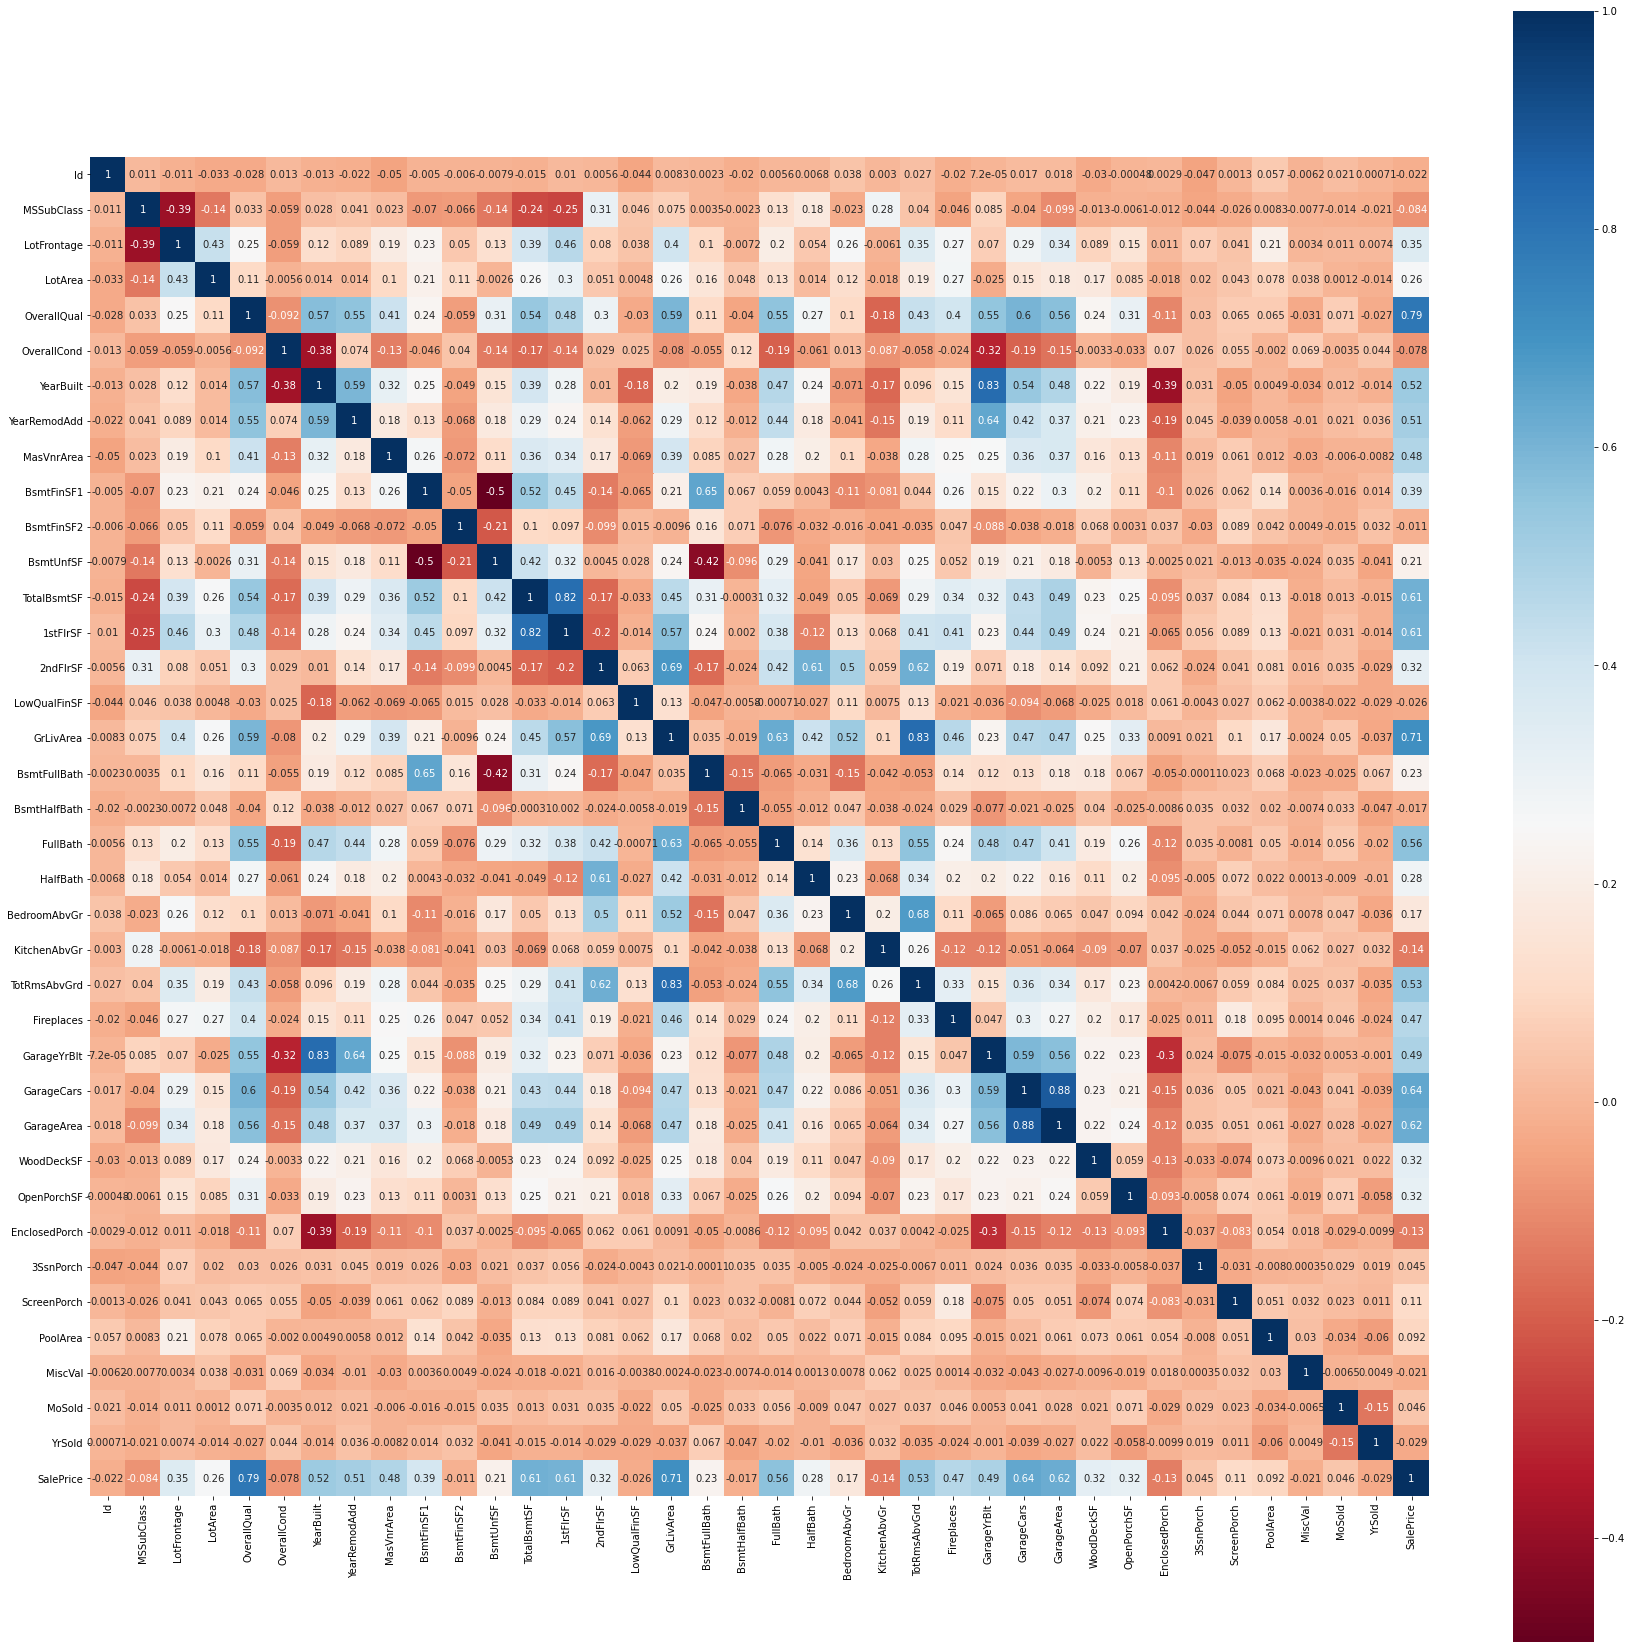

In [22]:
train_corr = train.corr()

colormap = plt.cm.RdBu
plt.figure(figsize=(30,30))
sns.heatmap(train_corr, square=True, cmap=colormap, annot=True)

この4組は相関関係が高そうである。

- **TotalBsmtSFと1stFlrSF**

- **GarageAreaとGarageCars**

- **GarageYrBltとYearBuilt**

- **TotRmsAbvGrdとGrLivArea**

#### 2. 目的変数との相関の高い特徴量10個を選び、これらだけの相関係数行列ヒートマップを作る。

In [23]:
train_corr_list = train_corr['SalePrice'].sort_values(ascending=False)#SalePriceと相関が高い物を降順で表す
print(train_corr_list[1:11])# その中の上位10個を抜き出す

OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64


<AxesSubplot:>

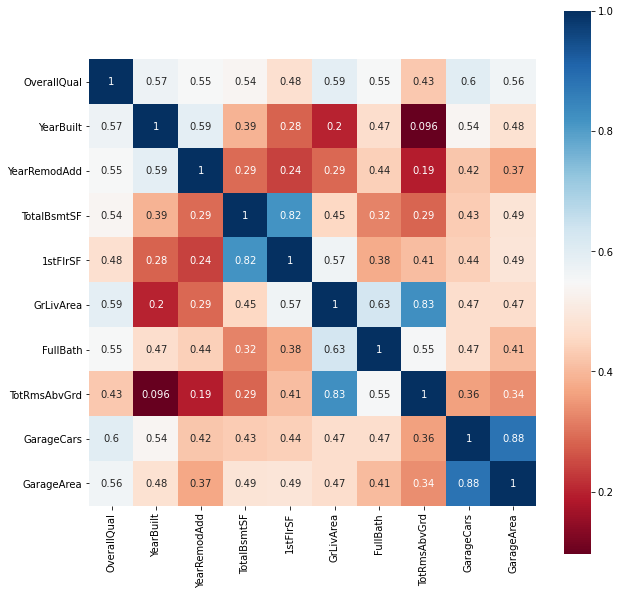

In [24]:
high_relationship = ['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 
             'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea']

high_relationship_corr = train[high_relationship].corr()

colormap = plt.cm.RdBu
plt.figure(figsize=(10,10))
sns.heatmap(high_relationship_corr, square=True, cmap=colormap, annot=True)

#### 3. 選んだ10個の特徴量が何か表しているかをKaggleのDataDescriptionの記述を参考に日本語でまとめる。

OverallQual：総合素材と仕上がりの品質

YearBuilt：元の建設日

YearRemodAdd：改造日

TotalBsmtSF：地下室の総平方フィート

1stFlrSF：1階平方フィート

GrLivArea：地上のリビングエリアの平方フィート

FullBath：グレード以上のフルバスルーム

TotRmsAbvGrd：グレード以上の部屋の合計（バスルームは含まれません）

GarageCars：車の容量でのガレージのサイズ

GarageArea：ガレージのサイズ（平方フィート）

#### 4. 選んだ10個の特徴量の中でお互いの相関係数が高い組み合わせを3つ探し出す。

1. GarageCarsとGarageArea
2. TotRmsAbvGrdとGrLivArea
3. 1stFlrSFとTotalBsmtSF